# Notebook Title - Linear Regression from Scratch using OLS Method

In this notebook we will fit Linear Regression Model using OLS Method.

We will first preprocess the diamonds dataset at data/diamond.csv

We will then fit Simple Linear Regression and Ridge (L1) Linear Regression using Ordinary Least Squares Method.

# Dataset Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
diamond = pd.read_csv('diamond.csv')

In [3]:
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75


In [4]:
diamond.dtypes

Unnamed: 0                              object
carat                                   object
cut                                     object
color                                   object
clarity                                 object
average us salary                        int64
number of diamonds mined (millions)    float64
depth                                   object
table                                   object
price                                   object
x                                       object
y                                       object
z                                       object
dtype: object

In [5]:
diamond.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           53563 non-null  object 
 1   carat                                52430 non-null  object 
 2   cut                                  52647 non-null  object 
 3   color                                52428 non-null  object 
 4   clarity                              53587 non-null  object 
 5   average us salary                    53940 non-null  int64  
 6   number of diamonds mined (millions)  53940 non-null  float64
 7   depth                                53246 non-null  object 
 8   table                                52398 non-null  object 
 9   price                                52357 non-null  object 
 10  x                                    52414 non-null  object 
 11  y                           

In [6]:
#Convert numerical features stored as string to numeric type
diamond['carat'] = pd.to_numeric(diamond['carat'],errors='coerce')
diamond['x'] = pd.to_numeric(diamond['x'],errors='coerce')
diamond['y'] = pd.to_numeric(diamond['y'],errors='coerce')
diamond['z'] = pd.to_numeric(diamond['z'],errors='coerce')
diamond['depth'] = pd.to_numeric(diamond['depth'],errors='coerce')
diamond['table'] = pd.to_numeric(diamond['table'],errors='coerce')
diamond['price'] = pd.to_numeric(diamond['price'],errors='coerce')

In [7]:
diamond.describe()

,carat,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
count,51073.000000,53940.000000,53940.000000,51866.000000,51030.000000,51844.000000,51027.000000,52208.000000,51532.000000
mean,0.797823,39521.990100,2.902669,61.750175,57.456332,3933.022047,5.731451,5.734517,3.538203
std,0.473747,5486.892971,1.325985,1.433485,2.231611,3989.013631,1.121433,1.142543,0.706057
min,0.200000,30000.000000,0.600000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,34780.000000,1.750000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,39547.500000,2.910000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,44252.000000,4.050000,62.500000,59.000000,5327.250000,6.540000,6.540000,4.030000
max,5.010000,48999.000000,5.200000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
diamond.head(100)

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.70,Good,E,VS2,39791,0.96,57.5,58.0,2759.0,5.85,5.90,3.38
96,97,0.70,Good,F,VS1,40460,2.47,59.4,62.0,2759.0,5.71,5.76,3.40
97,FALSE,NaN,Fair,F,FALSE,45321,3.92,66.3,NaN,2759.0,NaN,NaN,NaN
98,99,NaN,NaN,E,SI1,32659,4.89,61.6,59.0,NaN,5.77,NaN,3.56


In [9]:
diamond.drop(columns = ['Unnamed: 0'],inplace = True)

In [10]:
#Standardizing text features
diamond['color'] = diamond['color'].str.lower()
diamond['clarity'] = diamond['clarity'].str.lower()
diamond['cut'] = diamond['cut'].str.lower()

In [11]:
diamond.head()

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.23,ideal,e,si2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,premium,e,si1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,good,e,vs1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,premium,i,vs2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,good,j,si2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75


In [12]:
diamond.isna().sum()

carat                                  2867
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                  2074
table                                  2910
price                                  2096
x                                      2913
y                                      1732
z                                      2408
dtype: int64

In [13]:
diamond.shape

(53940, 12)

In [14]:
diamond.cut.unique()

array(['ideal', 'premium', 'good', 'very good', nan, 'fair', 'maybe',
       'false', 'true'], dtype=object)

In [15]:
diamond.color.unique()

array(['e', 'i', 'j', 'h', 'f', 'g', 'd', nan, 'maybe', 'true', 'false'],
      dtype=object)

In [16]:
diamond.clarity.unique()

array(['si2', 'si1', 'vs1', 'vs2', 'vvs2', 'vvs1', 'i1', 'maybe', 'false',
       'if', nan, 'true'], dtype=object)

In [17]:
#Replacing invalid values with na
diamond = diamond.replace({
            'cut':{'maybe':np.nan,'false':np.nan,'true':np.nan},
            'color':{'maybe':np.nan,'false':np.nan,'true':np.nan},
            'clarity':{'maybe':np.nan,'false':np.nan,'true':np.nan,'if':np.nan}
            })

In [18]:
diamond.isna().sum()

carat                                  2867
cut                                    2682
color                                  2890
clarity                                3472
average us salary                         0
number of diamonds mined (millions)       0
depth                                  2074
table                                  2910
price                                  2096
x                                      2913
y                                      1732
z                                      2408
dtype: int64

In [19]:
#Replacing na values
diamond_numerical_na_filled = diamond.fillna(value = {
    'depth':diamond['depth'].median(),
    'table':diamond['table'].median(),
    'carat':diamond['carat'].median(),
    'x':diamond['x'].median(),
    'y':diamond['y'].median(),
    'z':diamond['z'].median()})

In [20]:
diamond_numerical_na_filled.shape

(53940, 12)

In [21]:
diamond_numerical_na_filled.loc[diamond_numerical_na_filled.isna().any(axis=1)]

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
7,0.70,NaN,h,si1,37587,4.62,61.8,57.0,NaN,4.07,4.11,2.53
45,0.70,premium,NaN,NaN,31322,1.45,61.8,58.0,NaN,4.24,4.26,3.53
50,0.70,NaN,NaN,si1,36709,3.74,61.8,61.0,404.0,5.70,4.03,2.45
61,0.70,premium,NaN,si1,32760,1.23,61.8,59.0,552.0,4.23,4.27,3.53
70,0.70,NaN,NaN,vvs1,47906,1.38,61.8,57.0,NaN,5.70,5.71,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...
53890,0.70,good,NaN,si1,41032,3.38,61.8,57.0,2749.0,5.70,5.71,3.46
53896,0.83,NaN,NaN,si2,38225,0.85,62.4,57.0,2751.0,6.01,6.08,3.77
53911,0.57,premium,e,NaN,39378,2.87,59.8,60.0,2753.0,5.43,5.38,3.23
53915,0.70,ideal,NaN,si2,30041,3.49,62.1,57.0,NaN,5.70,5.86,3.63


In [22]:
diamond_numerical_na_filled.isna().sum()

carat                                     0
cut                                    2682
color                                  2890
clarity                                3472
average us salary                         0
number of diamonds mined (millions)       0
depth                                     0
table                                     0
price                                  2096
x                                         0
y                                         0
z                                         0
dtype: int64

In [23]:
#Fill na values in price using interpolation
diamond_numerical_na_filled['price'] = diamond_numerical_na_filled['price'].interpolate(method = 'linear')

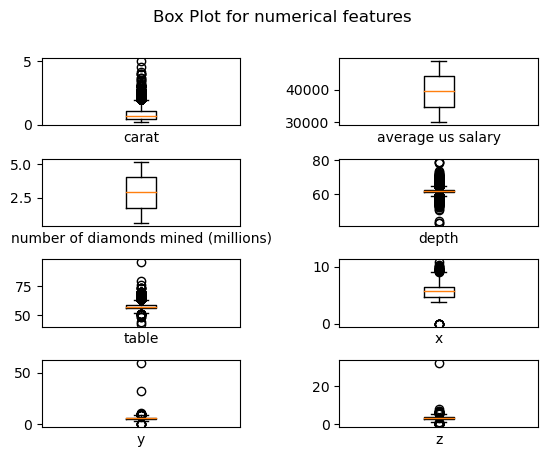

In [24]:
'''
Box Plots for numerical features
'''
fig, axs = plt.subplots(nrows = 4, ncols = 2)

axs[0][0].boxplot(diamond_numerical_na_filled['carat'])
axs[0][0].set_xticks([])
axs[0][0].set_xlabel('carat')

axs[0][1].boxplot(diamond_numerical_na_filled['average us salary'])
axs[0][1].set_xticks([])
axs[0][1].set_xlabel('average us salary')

axs[1][0].boxplot(diamond_numerical_na_filled['number of diamonds mined (millions)'])
axs[1][0].set_xticks([])
axs[1][0].set_xlabel('number of diamonds mined (millions)')

axs[1][1].boxplot(diamond_numerical_na_filled['depth'])
axs[1][1].set_xticks([])
axs[1][1].set_xlabel('depth')

axs[2][0].boxplot(diamond_numerical_na_filled['table'])
axs[2][0].set_xticks([])
axs[2][0].set_xlabel('table')

axs[2][1].boxplot(diamond_numerical_na_filled['x'])
axs[2][1].set_xticks([])
axs[2][1].set_xlabel('x')

axs[3][0].boxplot(diamond_numerical_na_filled['y'])
axs[3][0].set_xticks([])
axs[3][0].set_xlabel('y')

axs[3][1].boxplot(diamond_numerical_na_filled['z'])
axs[3][1].set_xticks([])
axs[3][1].set_xlabel('z')

fig.suptitle('Box Plot for numerical features')

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [25]:
#Drop rows with na values
diamond_impuned = diamond_numerical_na_filled.dropna()

In [26]:
diamond_impuned.shape

(47873, 12)

In [27]:
#Outlier Removal
def outlierArray(df, colName, alpha = 1.5):
    Q1 = df[colName].quantile(0.25)
    Q3 = df[colName].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - alpha*IQR
    upper = Q3 + alpha*IQR

    outlierArray = df[(df[colName] < lower) | (df[colName] > upper)]
    
    return outlierArray

In [28]:
outlierIndex = outlierArray(diamond_impuned, 'depth', 1.5)
diamond_impuned.loc[outlierIndex.index, 'depth'] = diamond_impuned['depth'].median()
outlierIndex

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
2,0.23,good,e,vs1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
8,0.22,fair,e,vs2,30454,4.02,65.1,61.0,337.0,3.87,3.78,2.49
24,0.31,very good,j,si1,39073,4.10,58.1,62.0,353.0,4.44,4.47,2.59
35,0.23,good,f,vs1,45958,5.15,58.2,59.0,402.0,4.06,4.08,2.37
42,0.26,good,d,vs2,37441,3.96,65.2,56.0,403.0,3.99,4.02,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...
53879,1.04,fair,g,si2,44018,3.38,65.2,57.0,2745.0,6.25,6.23,4.07
53882,0.71,fair,d,vs1,31579,4.28,65.4,59.0,2747.0,5.62,5.58,3.66
53886,0.70,good,d,vs2,40937,1.53,58.0,62.0,2749.0,5.78,5.87,3.38
53895,0.70,good,f,vs1,43085,3.56,57.8,61.0,2751.0,5.83,5.79,3.36


In [29]:
outlierIndex = outlierArray(diamond_impuned, 'table', 1.5)
diamond_impuned.loc[outlierIndex.index, 'table'] = diamond_impuned['table'].median()
outlierIndex

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
2,0.23,good,e,vs1,33517,3.85,61.8,65.0,327.0,4.05,4.07,2.31
91,0.86,fair,e,si2,35889,4.08,61.8,69.0,2757.0,6.45,6.33,3.52
145,0.70,good,h,vvs2,40755,1.55,62.1,64.0,2767.0,5.62,5.65,3.50
219,0.53,very good,d,vvs2,30552,4.45,61.8,64.0,2782.0,5.34,5.37,3.08
239,0.77,good,g,vs1,44656,2.84,59.4,64.0,2788.0,5.97,5.92,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...
53695,0.75,good,e,vs2,48733,3.87,59.7,65.0,2717.0,5.85,5.80,3.48
53697,0.70,fair,h,vvs2,44938,0.85,64.5,65.0,2717.0,5.52,5.45,3.54
53756,0.84,fair,g,vs1,41221,1.69,61.8,64.0,2724.0,6.42,6.32,3.54
53757,0.72,fair,f,vs2,32735,3.95,61.8,64.0,2724.0,6.06,5.97,3.34


In [30]:
outlierIndex = outlierArray(diamond_impuned, 'carat', 1.5)
diamond_impuned.loc[outlierIndex.index, 'carat'] = diamond_impuned['carat'].median()
outlierIndex

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
12246,2.06,premium,j,i1,40497,0.90,61.2,58.0,5203.0,8.10,8.07,4.95
13002,2.14,fair,j,i1,31965,2.97,61.8,57.0,5405.0,7.74,7.70,5.36
13118,2.15,fair,j,i1,42063,1.46,61.8,57.0,5430.0,8.01,7.95,5.23
13757,2.22,fair,j,i1,46284,2.53,61.8,56.0,5607.0,8.04,8.02,5.36
14138,2.27,fair,j,i1,33801,2.67,61.8,55.0,5733.0,8.05,8.00,5.43
...,...,...,...,...,...,...,...,...,...,...,...,...
27741,2.15,ideal,g,si2,31876,0.82,62.6,54.0,18791.0,8.29,8.35,5.21
27742,2.04,premium,h,si1,32337,4.02,61.8,60.0,18795.0,8.37,8.28,4.84
27744,2.29,premium,i,si1,44106,0.80,61.8,59.0,18797.0,8.52,8.45,5.24
27746,2.07,ideal,g,si2,38530,4.08,62.5,55.0,18804.0,8.20,8.13,5.11


In [31]:
outlierIndex = outlierArray(diamond_impuned, 'x', 1.5)
diamond_impuned.loc[outlierIndex.index, 'x'] = diamond_impuned['x'].median()
outlierIndex

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
11182,1.07,ideal,f,si2,47952,2.68,61.6,56.0,4954.0,0.00,6.62,0.00
11963,1.00,very good,h,vs2,31234,2.41,63.3,53.0,5139.0,0.00,0.00,0.00
15951,1.14,fair,g,vs1,37300,2.60,61.8,57.0,6381.0,0.00,0.00,0.00
22741,0.71,fair,h,i1,44891,1.84,61.8,62.0,10761.0,9.54,9.38,5.31
22831,0.71,good,i,i1,33254,4.87,61.8,57.0,10863.0,9.38,9.31,5.33
23644,0.71,fair,h,i1,39683,3.62,61.8,53.0,11668.0,9.53,9.48,6.38
24131,0.71,premium,h,i1,35790,4.83,62.1,58.0,12300.0,9.44,9.40,5.85
24297,0.71,ideal,i,i1,47761,4.56,62.6,55.0,12545.0,9.49,9.42,5.92
24328,0.71,ideal,h,i1,35509,1.76,62.8,57.0,12587.0,9.65,9.59,6.03
24520,1.56,ideal,g,vs2,48296,1.90,62.2,54.0,12800.0,0.00,0.00,0.00


In [32]:
outlierIndex = outlierArray(diamond_impuned, 'y', 1.5)
diamond_impuned.loc[outlierIndex.index, 'y'] = diamond_impuned['y'].median()
outlierIndex

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
11963,1.00,very good,h,vs2,31234,2.41,63.3,53.0,5139.0,5.71,0.00,0.00
15951,1.14,fair,g,vs1,37300,2.60,61.8,57.0,6381.0,5.71,0.00,0.00
22428,0.71,premium,e,i1,46589,2.44,60.9,58.0,10453.0,9.26,9.25,5.66
22741,0.71,fair,h,i1,44891,1.84,61.8,62.0,10761.0,5.71,9.38,5.31
22831,0.71,good,i,i1,33254,4.87,61.8,57.0,10863.0,5.71,9.31,5.33
23644,0.71,fair,h,i1,39683,3.62,61.8,53.0,11668.0,5.71,9.48,6.38
24067,2.00,premium,h,si2,37332,0.76,61.8,57.0,12210.0,8.09,58.90,8.06
24131,0.71,premium,h,i1,35790,4.83,62.1,58.0,12300.0,5.71,9.40,5.85
24297,0.71,ideal,i,i1,47761,4.56,62.6,55.0,12545.0,5.71,9.42,5.92
24328,0.71,ideal,h,i1,35509,1.76,62.8,57.0,12587.0,5.71,9.59,6.03


In [33]:
outlierIndex = outlierArray(diamond_impuned, 'z', 1.5)
diamond_impuned.loc[outlierIndex.index, 'z'] = diamond_impuned['z'].median()
outlierIndex

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
2207,1.00,premium,g,si2,41620,3.63,59.1,59.0,3142.0,6.55,6.48,0.00
2314,1.01,premium,h,i1,42225,1.65,61.8,59.0,3167.0,6.66,6.60,0.00
4791,1.10,premium,g,si2,41918,0.85,63.0,59.0,3696.0,6.50,6.47,0.00
5471,1.01,premium,f,si2,45800,3.48,59.2,58.0,3837.0,6.50,6.47,0.00
11182,1.07,ideal,f,si2,47952,2.68,61.6,56.0,4954.0,5.71,6.62,0.00
11963,1.00,very good,h,vs2,31234,2.41,63.3,53.0,5139.0,5.71,5.73,0.00
13601,1.15,ideal,g,vs2,38734,2.74,59.2,56.0,5564.0,6.88,6.83,0.00
15951,1.14,fair,g,vs1,37300,2.60,61.8,57.0,6381.0,5.71,5.73,0.00
17196,0.71,fair,j,i1,38560,3.44,61.8,56.0,6870.0,8.46,8.43,5.76
19346,0.71,fair,h,i1,45818,2.05,61.8,57.0,8044.0,8.93,8.84,5.97


In [34]:
#One Hot encoding
diamond_cleaned = pd.get_dummies(diamond_impuned,columns = ['cut','color','clarity'],dtype = float)

In [35]:
cleanedCorrMatrix = diamond_cleaned.corr().abs()
cleanedCorrMatrix

,carat,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z,cut_fair,...,color_h,color_i,color_j,clarity_i1,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
carat,1.000000,0.003214,0.009552,0.024642,0.168737,0.803788,0.903841,0.902746,0.903639,0.082667,...,0.103283,0.130201,0.131522,0.082719,0.067763,0.211360,0.052891,0.033318,0.176381,0.138983
average us salary,0.003214,1.000000,0.001269,0.000730,0.000097,0.007474,0.004561,0.004675,0.004091,0.005150,...,0.001551,0.003462,0.002757,0.004231,0.001912,0.003632,0.000937,0.009663,0.004533,0.007513
number of diamonds mined (millions),0.009552,0.001269,1.000000,0.000882,0.003510,0.012938,0.010239,0.009743,0.011012,0.005065,...,0.003716,0.003214,0.004231,0.003423,0.000361,0.005907,0.001284,0.007630,0.002627,0.000740
depth,0.024642,0.000730,0.000882,1.000000,0.215357,0.007264,0.018685,0.020467,0.069432,0.053721,...,0.015758,0.023233,0.021949,0.012102,0.052765,0.012842,0.026425,0.011041,0.028310,0.025913
table,0.168737,0.000097,0.003510,0.215357,1.000000,0.125026,0.182001,0.177275,0.147339,0.025270,...,0.017189,0.017927,0.032242,0.037141,0.048105,0.087777,0.037201,0.012645,0.074609,0.069918
price,0.803788,0.007474,0.012938,0.007264,0.125026,1.000000,0.883290,0.886691,0.878182,0.017792,...,0.065632,0.101693,0.080039,0.001739,0.003184,0.126723,0.012616,0.005098,0.099373,0.058175
x,0.903841,0.004561,0.010239,0.018685,0.182001,0.883290,1.000000,0.994733,0.985344,0.076956,...,0.101494,0.148074,0.161239,0.098138,0.067985,0.264929,0.068559,0.048229,0.194278,0.158294
y,0.902746,0.004675,0.009743,0.020467,0.177275,0.886691,0.994733,1.000000,0.985412,0.067164,...,0.099904,0.149715,0.161964,0.092673,0.068300,0.263406,0.068074,0.048120,0.192838,0.156604
z,0.903639,0.004091,0.011012,0.069432,0.147339,0.878182,0.985344,0.985412,1.000000,0.107661,...,0.103451,0.149647,0.162486,0.104427,0.071870,0.263827,0.070676,0.049508,0.195990,0.159177
cut_fair,0.082667,0.005150,0.005065,0.053721,0.025270,0.017792,0.076956,0.067164,0.107661,1.000000,...,0.016206,0.005544,0.017264,0.179209,0.000669,0.051887,0.023646,0.029727,0.042557,0.031076


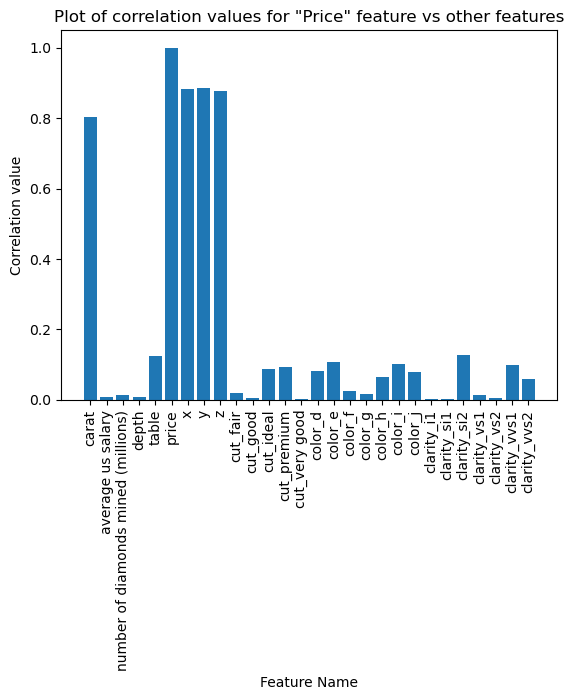

In [36]:
'''
Correlation graph for price feature vs other features
'''
fig = plt.bar(cleanedCorrMatrix['price'].index,cleanedCorrMatrix['price'])
plt.xlabel("Feature Name")
plt.ylabel("Correlation value")
plt.title("Plot of correlation values for \"Price\" feature vs other features")
plt.xticks(rotation=90)
plt.show()

In [37]:
diamond_dropped = diamond_cleaned.copy(deep = True)

In [38]:
diamond_dropped.head(100)

,carat,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z,cut_fair,...,color_h,color_i,color_j,clarity_i1,clarity_si1,clarity_si2,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2
0,0.23,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,33517,3.85,61.8,57.0,327.0,4.05,4.07,2.31,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.74,47924,4.83,61.6,55.0,2760.0,5.80,5.85,3.59,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
103,0.75,48430,2.79,61.7,58.0,2760.0,5.85,5.79,3.59,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
104,0.80,47639,2.55,62.9,56.0,2760.0,5.94,5.87,3.72,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
105,0.75,35977,2.88,62.2,55.0,2760.0,5.87,5.80,3.63,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
diamond_dropped.to_csv('data/diamond_preprocessed_v2.csv', index=False)

In [40]:
diamond_dropped.shape

(47873, 28)

In [41]:
diamonds_preprocessed = pd.read_csv('data/diamond_preprocessed_v2.csv')

In [42]:
diamonds_train = diamonds_preprocessed.sample(frac = 0.8)
diamonds_test = diamonds_preprocessed.drop(index = diamonds_train.index)

In [43]:
y_train = diamonds_train['price']
y_test = diamonds_test['price']

In [44]:
x_train = diamonds_train.drop(columns = ['price'])
x_test = diamonds_test.drop(columns = ['price'])

In [45]:
print("X_train dimensions : {0} and Y_train dimensions : {1}".format(x_train.shape,y_train.shape))
print("X_test dimensions : {0} and Y_test dimensions : {1}".format(x_test.shape,y_test.shape))

X_train dimensions : (38298, 27) and Y_train dimensions : (38298,)
X_test dimensions : (9575, 27) and Y_test dimensions : (9575,)


In [46]:
#Normalization of train dataset
x_train['table'] = x_train['table'].sub(x_train['table'].min()).div((x_train['table'].max()-x_train['table'].min()))
x_train['carat'] = x_train['carat'].sub(x_train['carat'].min()).div((x_train['carat'].max()-x_train['carat'].min()))
x_train['x'] = x_train['x'].sub(x_train['x'].min()).div((x_train['x'].max()-x_train['x'].min()))
x_train['y'] = x_train['y'].sub(x_train['y'].min()).div((x_train['y'].max()-x_train['y'].min()))
x_train['z'] = x_train['z'].sub(x_train['z'].min()).div((x_train['z'].max()-x_train['z'].min()))

In [47]:
#Normalization of test dataset
x_test['table'] = x_test['table'].sub(x_test['table'].min()).div((x_test['table'].max()-x_test['table'].min()))
x_test['carat'] = x_test['carat'].sub(x_test['carat'].min()).div((x_test['carat'].max()-x_test['carat'].min()))
x_test['x'] = x_test['x'].sub(x_test['x'].min()).div((x_test['x'].max()-x_test['x'].min()))
x_test['y'] = x_test['y'].sub(x_test['y'].min()).div((x_test['y'].max()-x_test['y'].min()))
x_test['z'] = x_test['z'].sub(x_test['z'].min()).div((x_test['z'].max()-x_test['z'].min()))

In [48]:
#Adding bias term to input features
x_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))
x_train = np.hstack((np.ones((x_train.shape[0],1)),x_train))

# Simple Linear Regression

In [49]:
#Finding weight matrix using OLS method
w = np.matmul(np.linalg.inv(np.dot(x_test.T,x_test)),np.dot(x_test.T,y_test))

In [50]:
print("Shape of Weights matrix {}".format(w.shape))

Shape of Weights matrix (28,)


In [51]:
# Predicting the price value using calculated weights for test dataset
y_pred = (np.dot(w,x_test.T)).T

In [52]:
print("Shape of y_pred {}".format(y_pred.shape))

Shape of y_pred (9575,)


In [53]:
#Calculating mse value
mse = np.mean(np.power((y_pred-y_test),2))

In [54]:
print("Mean Square Error is {}".format(mse))

Mean Square Error is 16266483791.563906


In [55]:
#Calculating R2 score value

r2 = 1 - (np.mean(np.power((y_pred-y_test),2)) / np.mean(np.power((y_test-np.mean(y_test)),2)))

In [56]:
print("R2 score is {}".format(r2))

R2 score is -1026.3987560328453


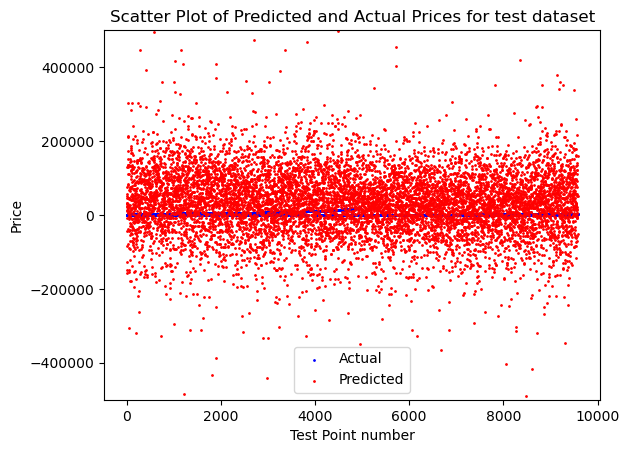

In [57]:
#Plotting y_test and y_pred values for the test dataset using scatter plot
plt.scatter(range(1,y_test.shape[0]+1), y_test, color='blue', label='Actual', s = 1)
plt.scatter(range(1,y_pred.shape[0]+1), y_pred, color='red', label='Predicted', s = 1)
plt.xlabel('Test Point number')
plt.ylabel('Price')
plt.title('Scatter Plot of Predicted and Actual Prices for test dataset')
plt.ylim(-0.5e6,0.5e6)
plt.legend()
plt.show()

# Ridge (L1) Linear Regression 

In [60]:
#Finding weight matrix using OLS for Ridge Regression method
ridge_lambda = 10
w_ridge = np.matmul(np.linalg.inv(np.add(np.dot(x_test.T,x_test),ridge_lambda*np.identity(x_test.shape[1]))),np.dot(x_test.T,y_test))

In [61]:
print("Shape of Weights matrix {}".format(w_ridge.shape))

Shape of Weights matrix (28,)


In [62]:
# Predicting the price value using calculated weights for test dataset
y_pred_ridge = (np.dot(w_ridge,x_test.T)).T

In [63]:
print("Shape of y_pred {}".format(y_pred_ridge.shape))

Shape of y_pred (9575,)


In [64]:
#Calculating mse value
mse = np.mean(np.power((y_pred_ridge-y_test),2))

In [65]:
print("Mean Square Error is {}".format(mse))

Mean Square Error is 2588176.9568626285


In [66]:
#Calculating R2 score value

r2 = 1 - (np.mean(np.power((y_pred_ridge-y_test),2)) / np.mean(np.power((y_test-np.mean(y_test)),2)))

In [67]:
print("R2 score is {}".format(r2))

R2 score is 0.8365295278348606


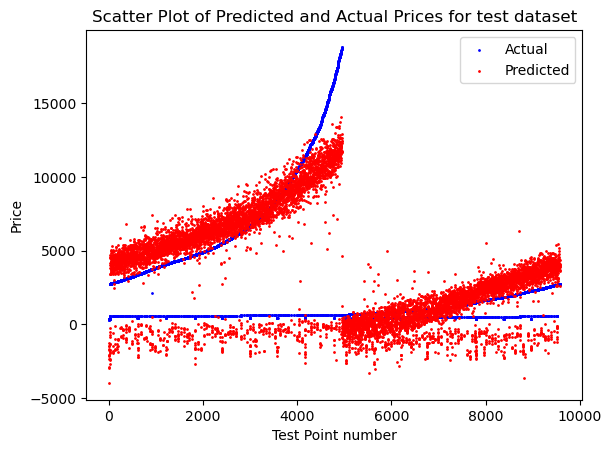

In [68]:
#Plotting y_test and y_pred values for the test dataset using scatter plot
plt.scatter(range(1,y_test.shape[0]+1), y_test, color='blue', label='Actual', s = 1)
plt.scatter(range(1,y_pred_ridge.shape[0]+1), y_pred_ridge, color='red', label='Predicted', s = 1)
plt.xlabel('Test Point number')
plt.ylabel('Price')
plt.title('Scatter Plot of Predicted and Actual Prices for test dataset')
plt.legend()
plt.show()

#### References
1) https://docs.python.org/3/index.html
2) https://matplotlib.org/stable/
3) https://pandas.pydata.org/docs/reference/index.html
4) https://numpy.org/doc/stable/index.html